## seaborn

Seaborn ist ein Daten Visualisierungspaket in Python speziell für Statistik. Es ist aufgebaut auf matplotlib und arbeiten verwand mit den Strukturen von Pandas.

In [1]:
# import packages
import seaborn as sns
import pandas as pd
import numpy as np

# import warnings
import warnings

In [2]:
# load data
df = pd.read_csv('fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
df[(df.Weight == 0) == True]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [8]:
df[(df.Species == 'Roach') == True].sort_values('Length1')[3:8]

,Species,Weight,Length1,Length2,Length3,Height,Width
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943


In [9]:
warnings.filterwarnings('ignore')
df['Weight'] = [120 if i == 0 else i for i in df.Weight]


In [10]:
df[(df.Species == 'Roach') == True].sort_values('Length1')[3:8]

,Species,Weight,Length1,Length2,Length3,Height,Width
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
40,Roach,120.0,19.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943


In [11]:
df['+/-_300'] = ['plus_300' if i > 299 else 'minus_300' for i in df.Weight]
df['volume'] = df['Length1'] * df['Height'] * df['Width']
df['gram_volume'] = df['volume'] / df['Weight']
df.describe()

,Weight,Length1,Length2,Length3,Height,Width,volume,gram_volume
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,399.081132,26.247170,28.415723,31.227044,8.970994,4.417486,1421.512758,3.490232
std,357.258993,9.996441,10.716328,11.610246,4.286208,1.685804,1267.893948,0.579087
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600,16.940572,2.064384
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650,413.713963,3.086956
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500,879.678239,3.436194
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500,2409.590966,3.860851
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,4771.551840,6.123624


In [12]:
df['sort_gram_volume'] = ['small' if i < 3.5 else 'big' for i in df.gram_volume]

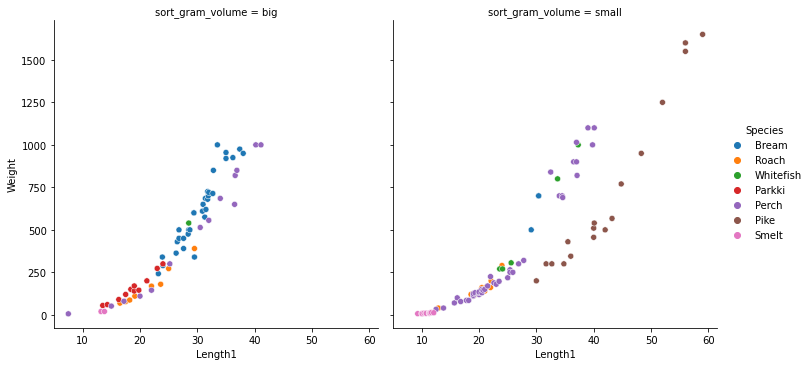

In [13]:
# Create a visualization
# relplot for different statistical relationships
sns.relplot(
    data=df,
    x="Length1", y="Weight", col="sort_gram_volume",
    hue="Species"
);

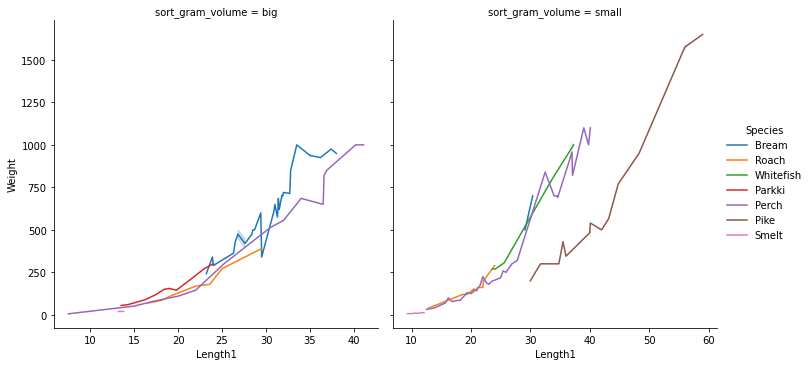

In [14]:
sns.relplot(
    data=df, kind="line",
    x="Length1", y="Weight", col="sort_gram_volume",
    hue="Species",# style="Weight", 
    facet_kws=dict(sharex=False),
)

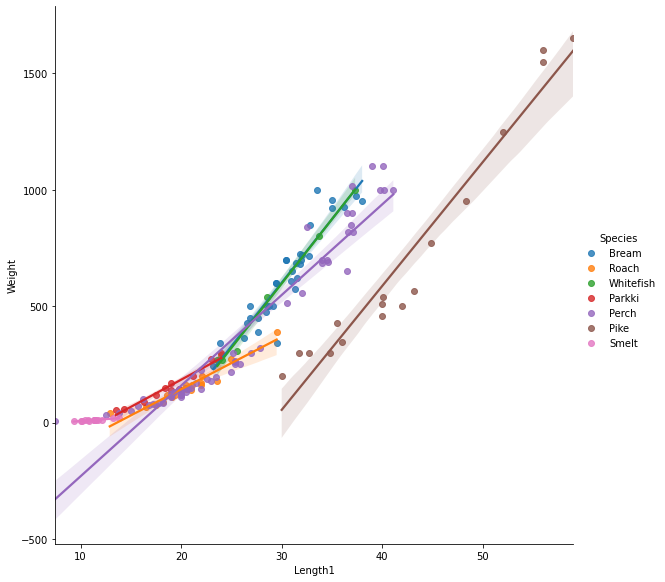

In [15]:
# lmplot includes a linear regression model
sns.lmplot(data = df,x="Length1", y="Weight", hue="Species", size = 8 );

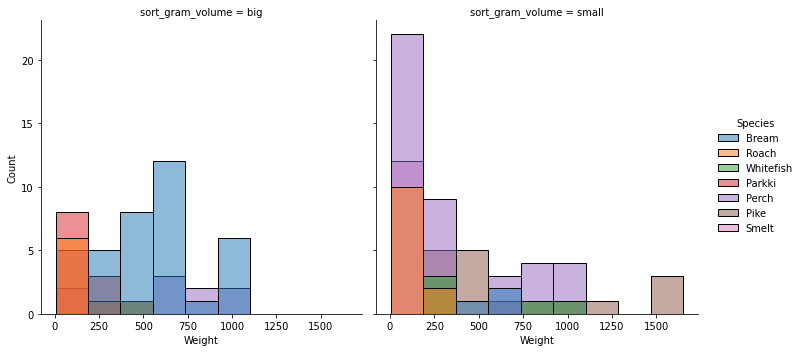

In [16]:
# histogram - only x, kde=True creates the line
sns.displot(
    data=df, x="Weight", col="sort_gram_volume",
    hue="Species");

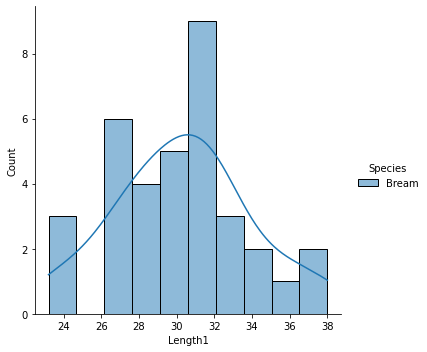

In [17]:
# histogram - only x, kde=True creates the kernel density estimation
sns.displot(
    data=df[(df.Species == 'Bream') == True], x="Length1", bins = 10,
    hue="Species", kde = True);

In [19]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,+/-_300,volume,gram_volume,sort_gram_volume
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,minus_300,1074.401280,4.439675,big
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,minus_300,1289.613312,4.446942,big
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,plus_300,1389.244539,4.086013,big
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,plus_300,1491.696945,4.109358,big
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,plus_300,1693.018644,3.937253,big


In [32]:
df[(df.Species == 'Perch') == True].describe()

,Weight,Length1,Length2,Length3,Height,Width,volume,gram_volume
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723,1327.996305,3.363008
std,347.617717,8.561572,9.021668,9.529509,2.878177,1.774626,1256.812327,0.326301
min,5.900000,7.500000,8.400000,8.800000,2.112000,1.408000,22.302720,2.649119
25%,120.000000,19.825000,21.825000,23.325000,5.692500,3.525000,397.556975,3.155866
50%,207.500000,23.250000,25.300000,26.750000,6.921800,4.154900,643.756902,3.369948
75%,692.500000,34.125000,36.625000,39.075000,10.846500,6.448125,2433.636157,3.503254
max,1100.000000,41.100000,44.000000,46.600000,12.800200,8.142000,4125.395074,4.125395


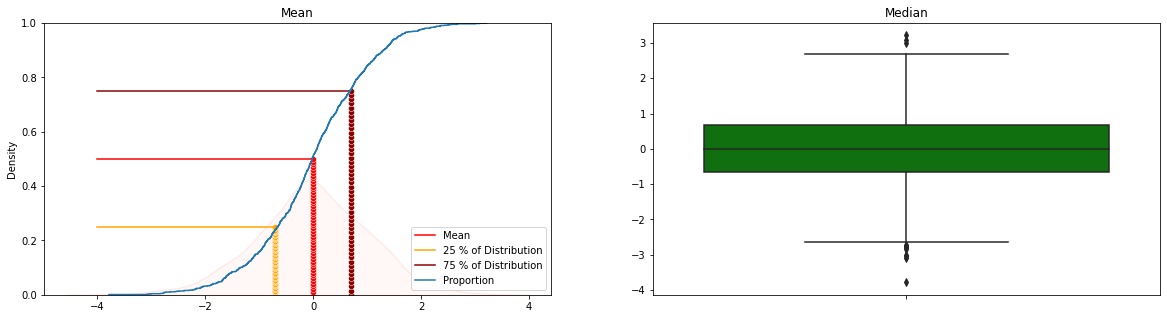

In [104]:
import matplotlib.pyplot as plt
# create t distributed values
np.random.seed(280000)
x = np.random.randn(1000)

# data for lines
x1_25 = np.linspace(-4, -0.7, 100)
x1_50 = np.linspace(-4, 0, 100)
x1_75 = np.linspace(-4, 0.7, 100)
y_50 = [0.5 for i in x1]
y_25 = [0.25 for i in x1]
y_75 = [0.75 for i in x1]
y1_25 = np.linspace(0, 0.25, 50)
y1_50 = np.linspace(0, 0.5, 50)
y1_75 = np.linspace(0, 0.75, 50)
x_50 = [0 for i in y1]
x_25 = [-0.7 for i in y1]
x_75 = [0.7 for i in y1]

# create several plots in one graph
fig, ax = plt.subplots(1, 2, figsize= (20, 5))
sns.kdeplot(x, fill = True, ax = ax[0], color = 'MistyRose'); 
sns.lineplot(x1_50, y_50, ax = ax[0], color = 'red');
sns.scatterplot(x_50, y1_50, ax = ax[0], color = 'red');
sns.lineplot(x1_25, y_25, ax = ax[0], color = 'orange');
sns.scatterplot(x_25, y1_25, ax = ax[0], color = 'orange');
sns.lineplot(x1_75, y_75, ax = ax[0], color = 'darkred');
sns.scatterplot(x_75, y1_75, ax = ax[0], color = 'darkred');
sns.ecdfplot(x, ax = ax[0]);
ax[0].legend(['Mean', '25 % of Distribution', '75 % of Distribution', 'Proportion']);
ax[0].set_title('Mean');

# boxplot
sns.boxplot(y = x, ax = ax[1], color = 'green');
ax[1].set_title('Median');


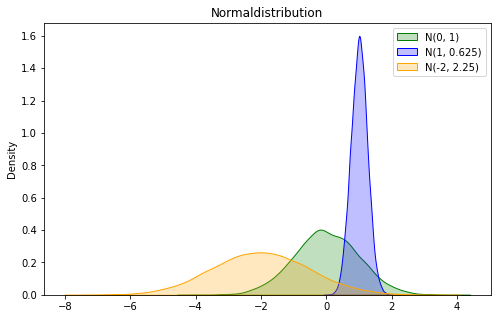

In [127]:
# N(mü, var) = N(0, 1)
n1 = 0 + 1 * np.random.randn(10000)
# N(1, 0.625)
n2 = 1 + 0.25 * np.random.randn(10000)
# N(-1, 2.25)
n3 = -2 + 1.5 * np.random.randn(10000)

# create several plots in one graph
fig, ax = plt.subplots(figsize= (8, 5))
sns.kdeplot(n1, fill = True, ax = ax, color = 'green'); 
sns.kdeplot(n2, fill = True, ax = ax, color = 'blue');
sns.kdeplot(n3, fill = True, ax = ax, color = 'orange');
plt.legend(['N(0, 1)', 'N(1, 0.625)', 'N(-2, 2.25)']);
ax.set_title('Normaldistribution');

### Categorical Data

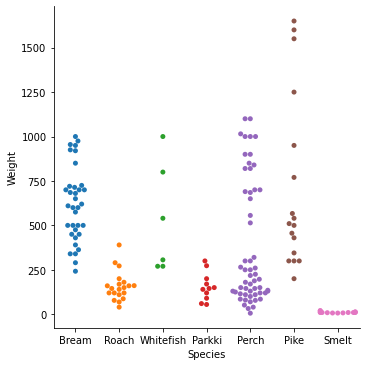

In [107]:
# catplot for categorical dataset
sns.catplot(data = df,kind = 'swarm', x="Species", y="Weight", size = 5 );

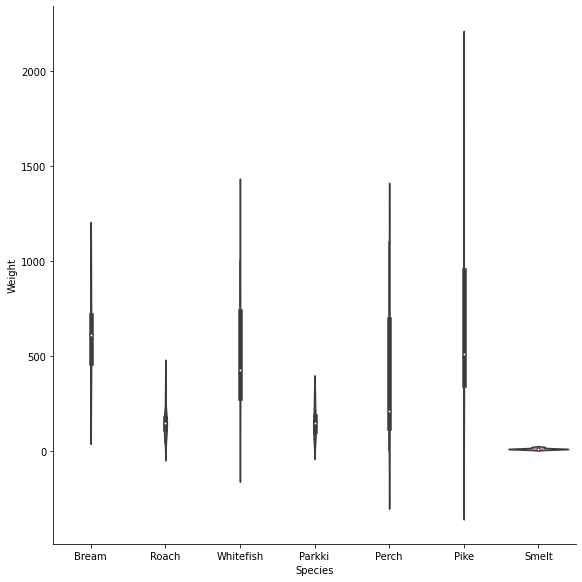

In [109]:
sns.catplot(data = df,kind = 'violin', x="Species", y="Weight", size = 8 );

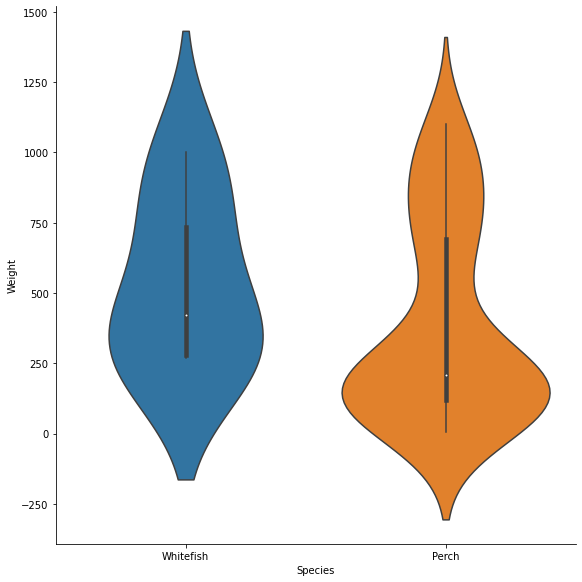

In [115]:
sns.catplot(data = df[((df.Species == 'Whitefish') | (df.Species == 'Perch')) == True],kind = 'violin', x="Species", y="Weight", size = 8 );

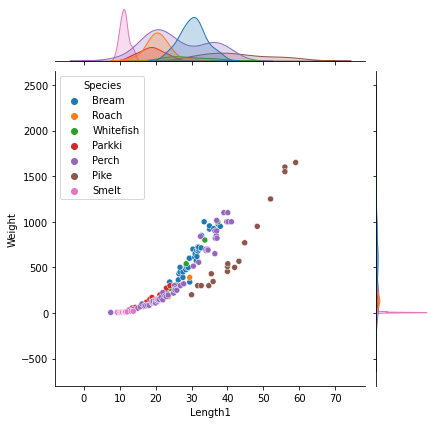

In [110]:
sns.jointplot(data = df, x="Length1", y="Weight", hue = 'Species' );

In [116]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'o_300', 'over_under', '+/-_300', 'volume', 'gram_1000V', 'gram_volume',
       'sort_gram_volume'],
      dtype='object')

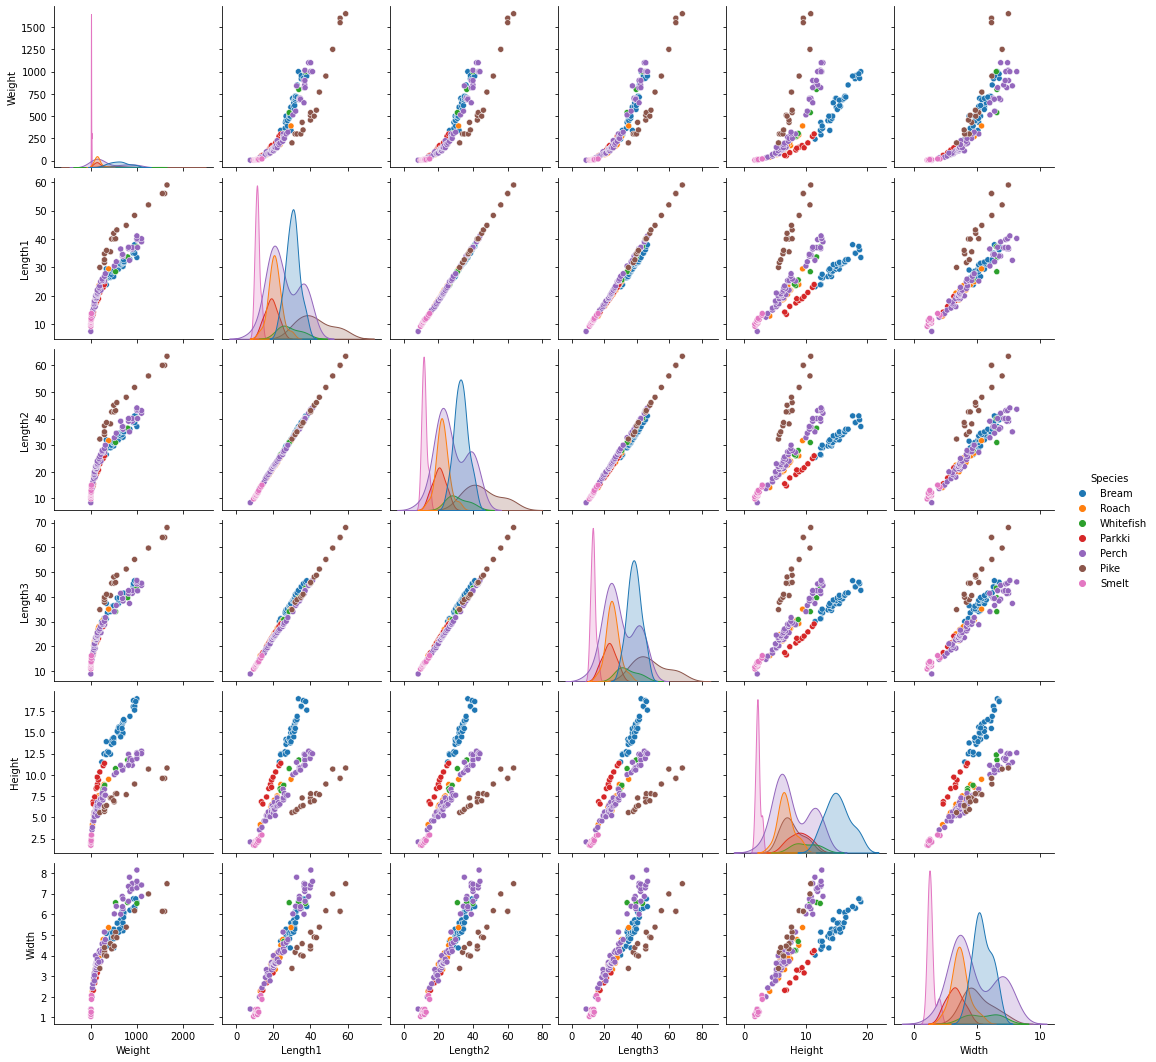

In [118]:
df_1 = df[['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
sns.pairplot(data=df_1, hue='Species');

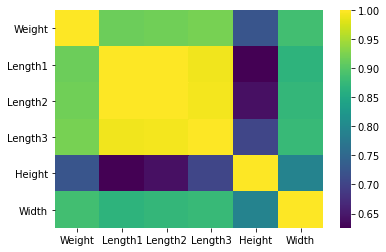

In [119]:
sns.heatmap(df_1.corr(), cmap = 'viridis');